# EDA 1

## Data Cleaning and Preparation:

In [1]:
import pandas as pd
from scipy import stats
import numpy as np


df = pd.read_csv('Cardiotocographic.csv')
print("Data Loaded Successfully")
df.head()

Data Loaded Successfully


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [23]:
df.shape

(2105, 14)

In [2]:
df.dropna(inplace=True)
df.shape

(2105, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


## correct any inconsistencies in data types

In [ ]:
for col in df.columns:
    if pd.api.types.is_float_dtype(df[col]):
        # convert to int only if no decimals exist
        if (df[col] % 1 == 0).all():
            df[col] = df[col].astype('int64')


## treat outliers

In [4]:
import pandas as pd

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers.sum())

LB           10
AC           39
FM          343
UC           13
DL          124
DS          120
DP          284
ASTV         10
MSTV         78
ALTV        317
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [5]:
def cap_outliers(df):
    df_new = df.copy()
    for col in df.select_dtypes(include='number'):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_new[col] = df[col].clip(lower, upper)
    return df_new

df = cap_outliers(df)


In [6]:
print(df.shape)
df.head()

(2105, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0


## Statistical Summary:

In [ ]:
mean=df.mean(axis=0)
median=df.median(axis=0)
std=df.std(axis=0)
iqr=df.quantile(0.75)-df.quantile(0.25)


central_tendency=pd.DataFrame([mean,median,std,iqr],index=['Mean','Median','standard deviation','Interquartile Range'])
central_tendency

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
Mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
Median,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
standard deviation,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
Interquartile Range,14.000000,0.005650,0.002554,0.004698,0.003289,0.000000,0.000000,29.000000,1.000000,11.000000,6.300000,63.000000,1.000000,0.000000


### summary

1. **LB** : The mean (133.34) and median (133.00) are very close, indicating a symmetric distribution.

2. **AC**: The mean (0.003202) is higher than the median (0.001631), suggesting a right-skewed distribution.

3. **FM** and **DL**: Both have means significantly higher than their medians, indicating substantial right skewness.

4. **DS** and **DP**: Both have means very close to zero and medians of zero, implying many zero values in the data.

5. **ASTV (%)**: High mean (46.99) and median (49.00) with a large standard deviation (18.85), suggesting high variability.

6. **ALTV (%)**: High variability with a mean (10.35) and a median of zero, indicating many zero values and a right-skewed distribution.

7. **NSP**: The mean (1.30) is slightly higher than the median (1.00), indicating a slight right skewness.

## Data Visualization:

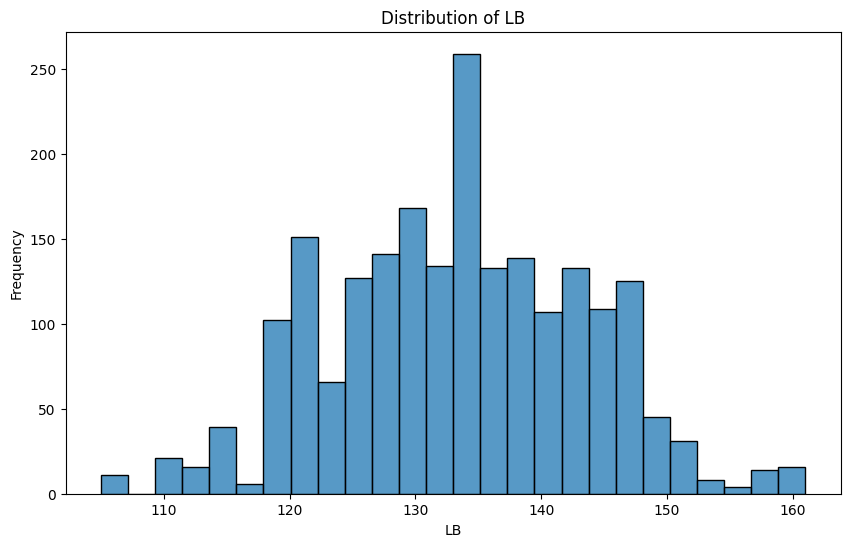

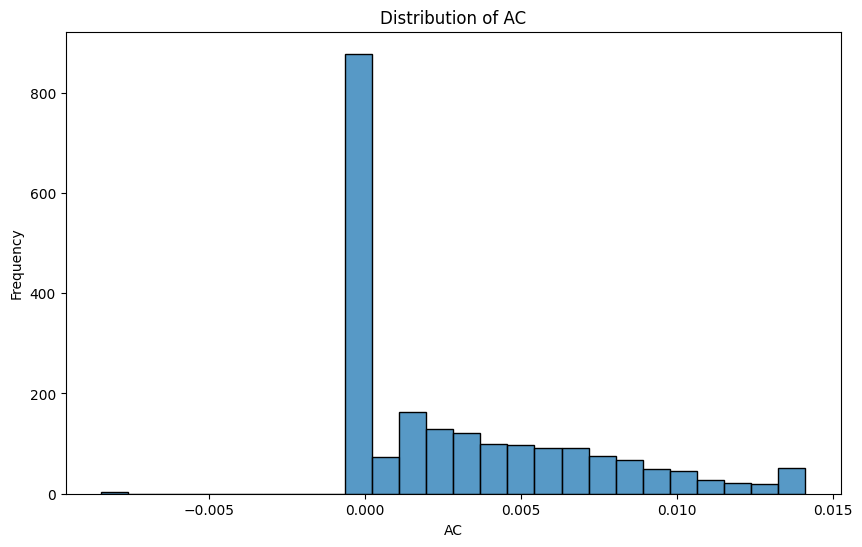

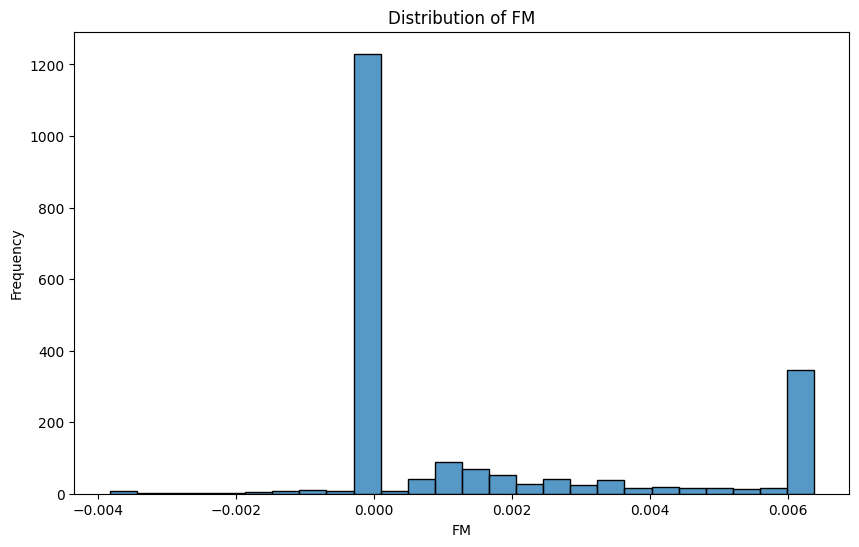

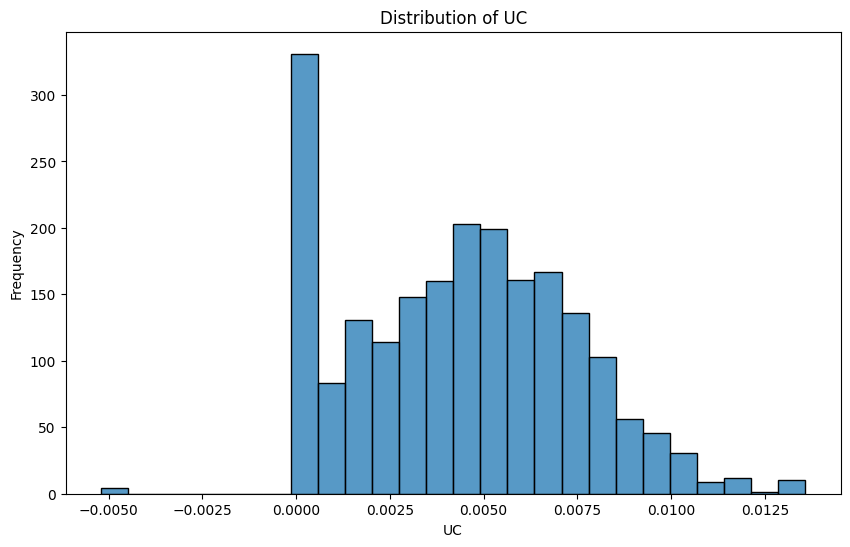

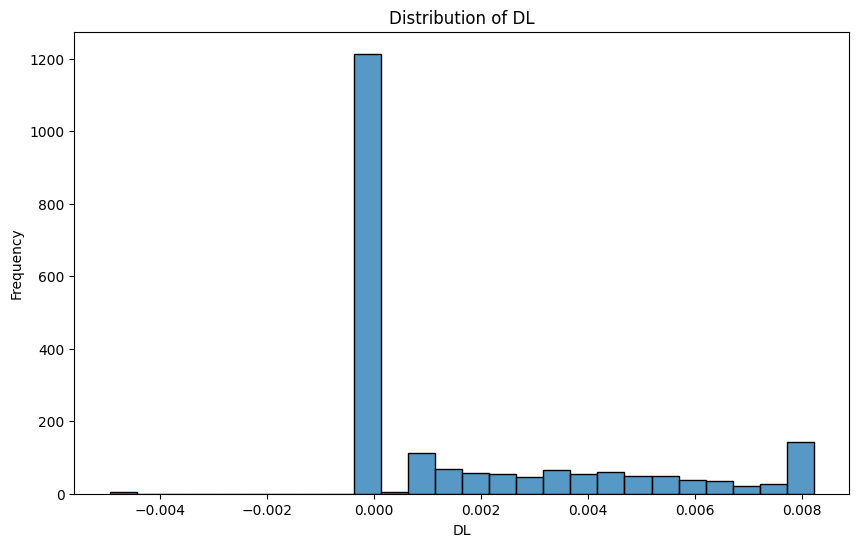

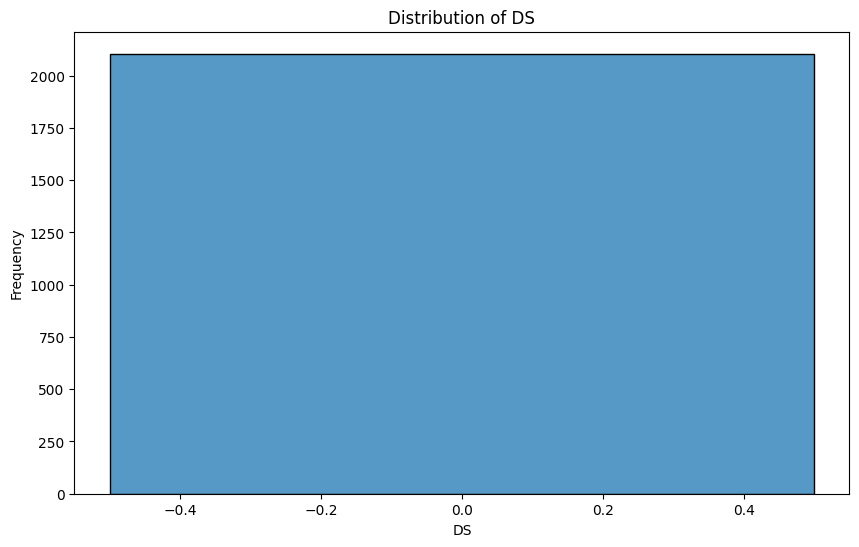

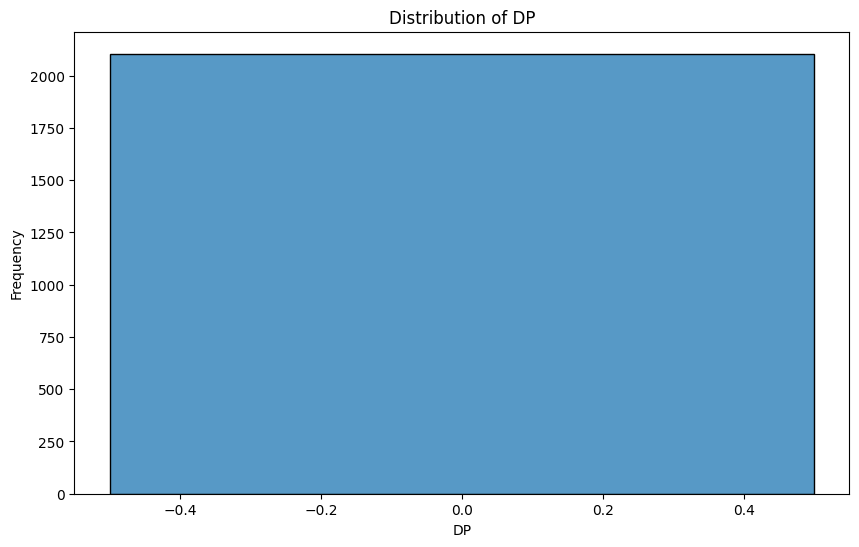

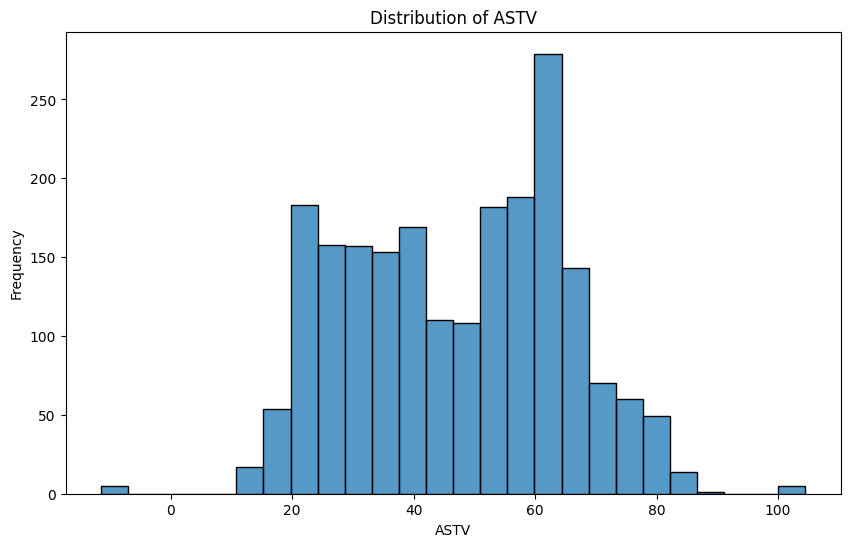

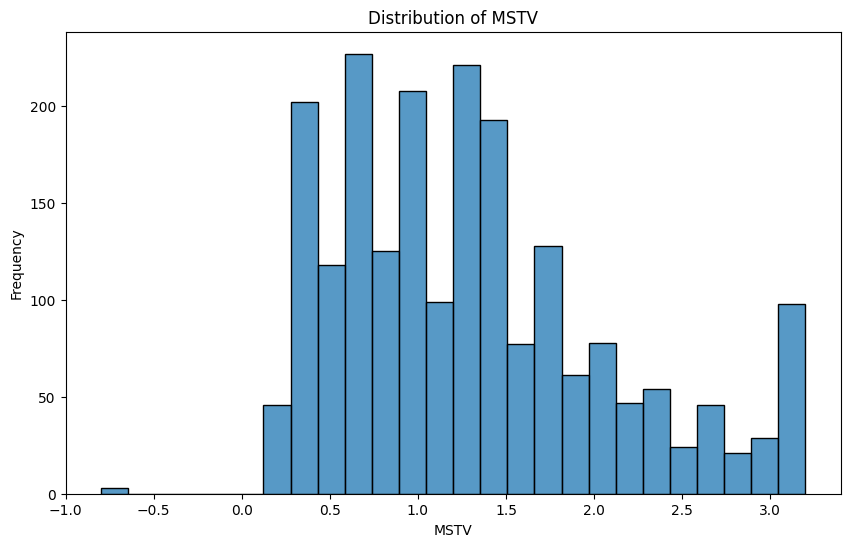

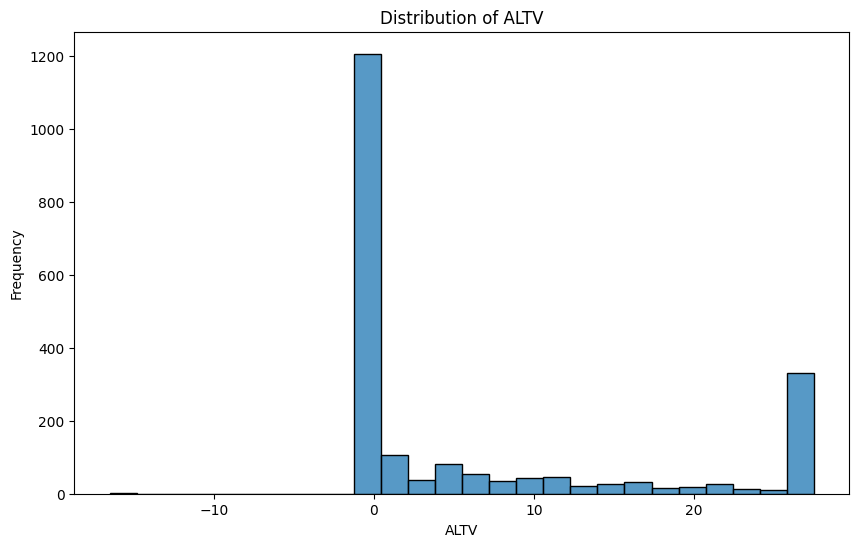

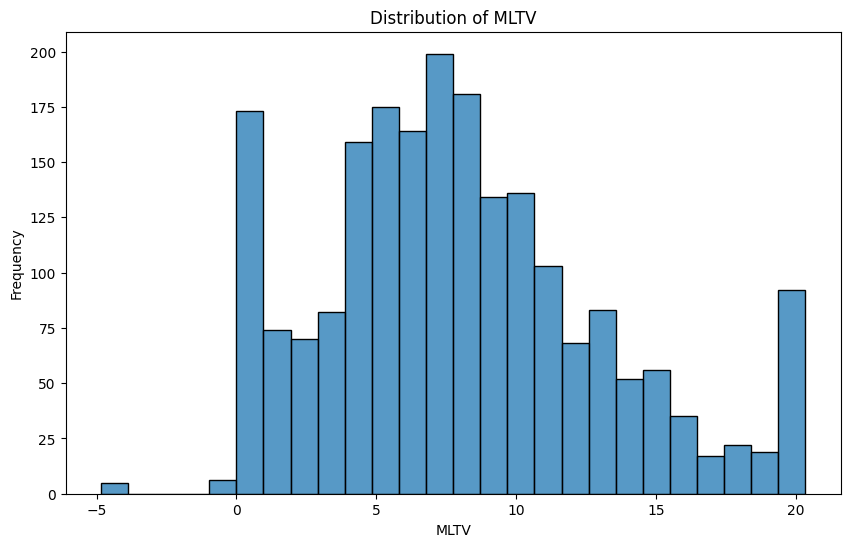

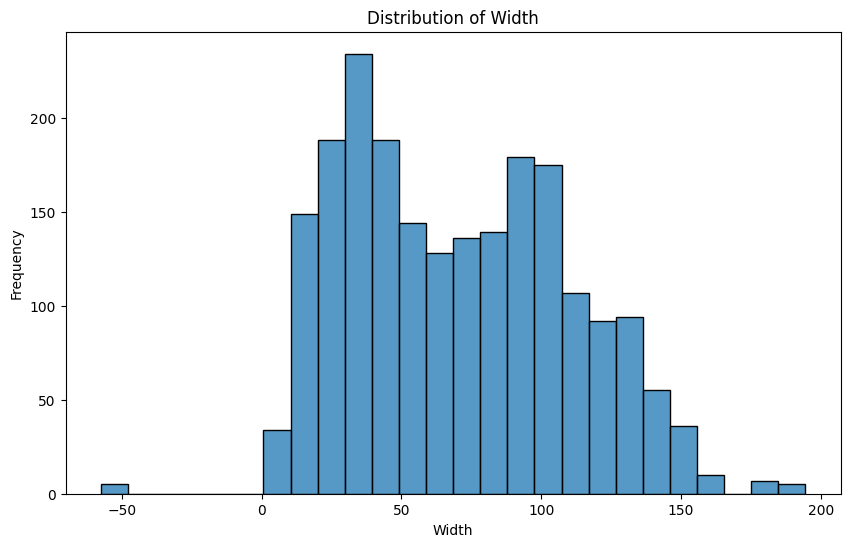

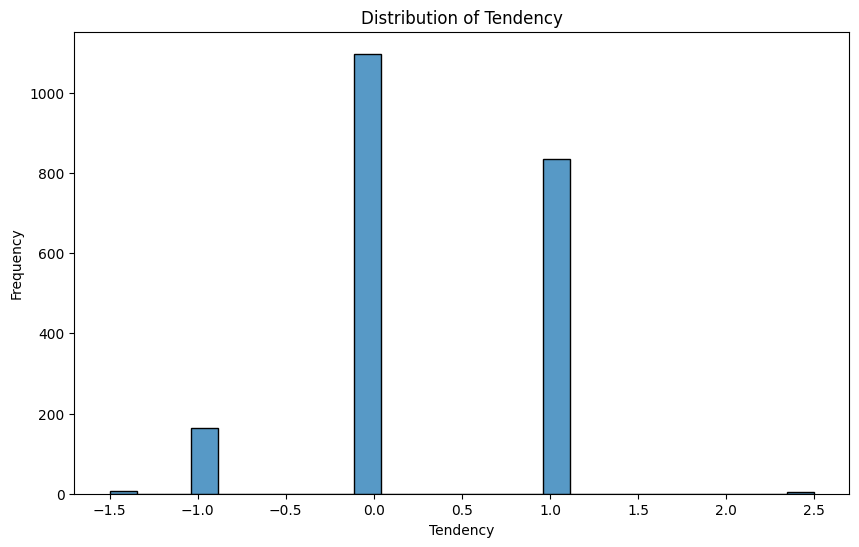

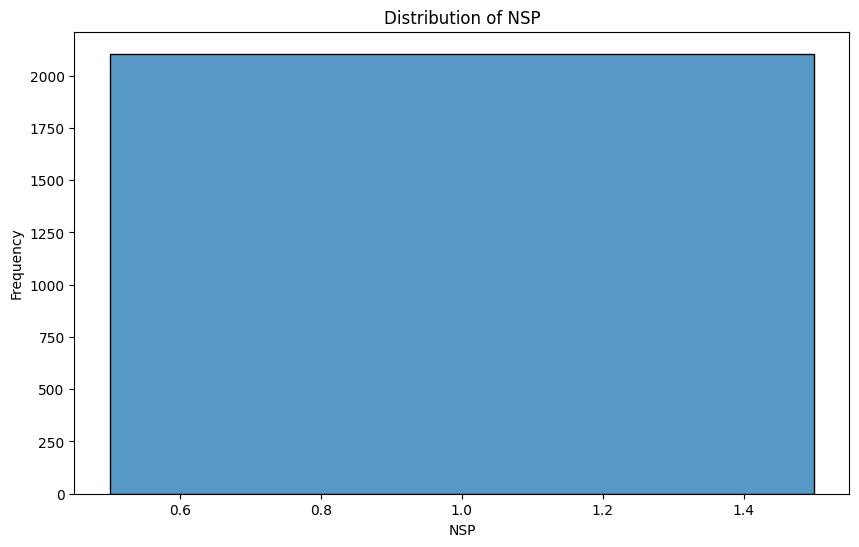

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

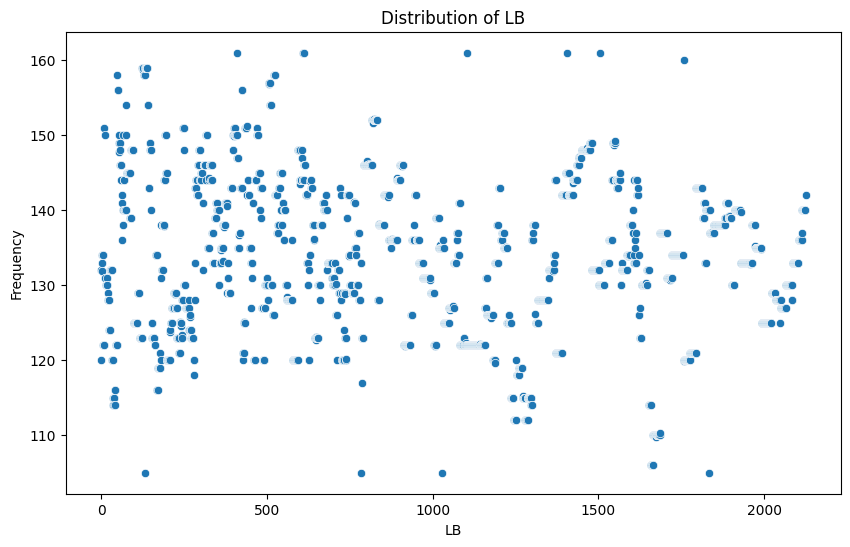

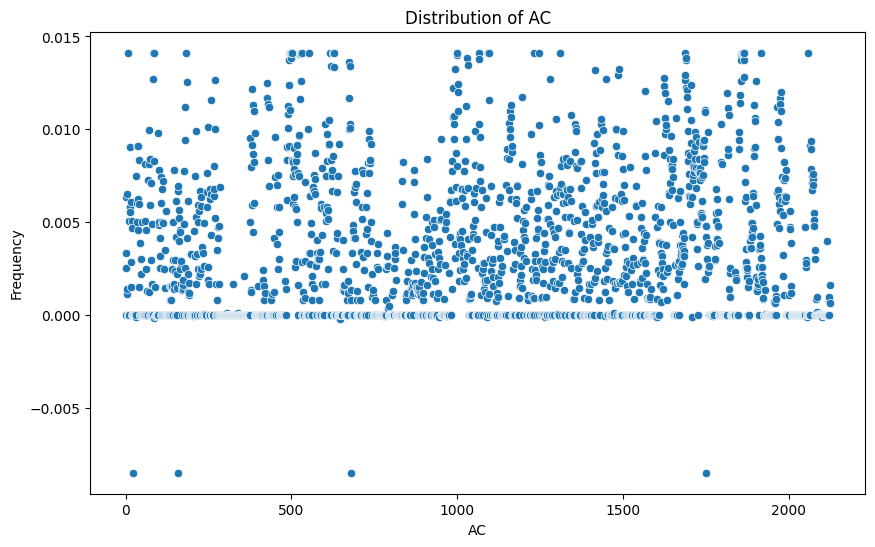

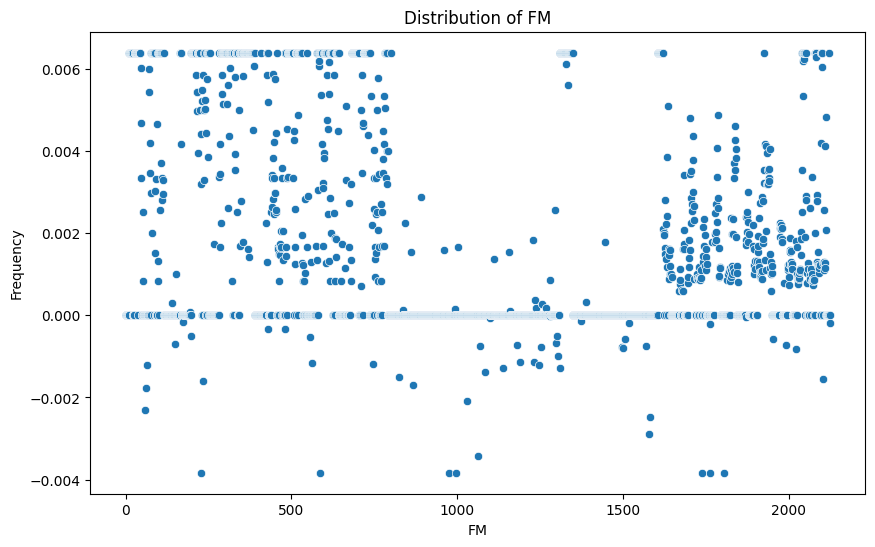

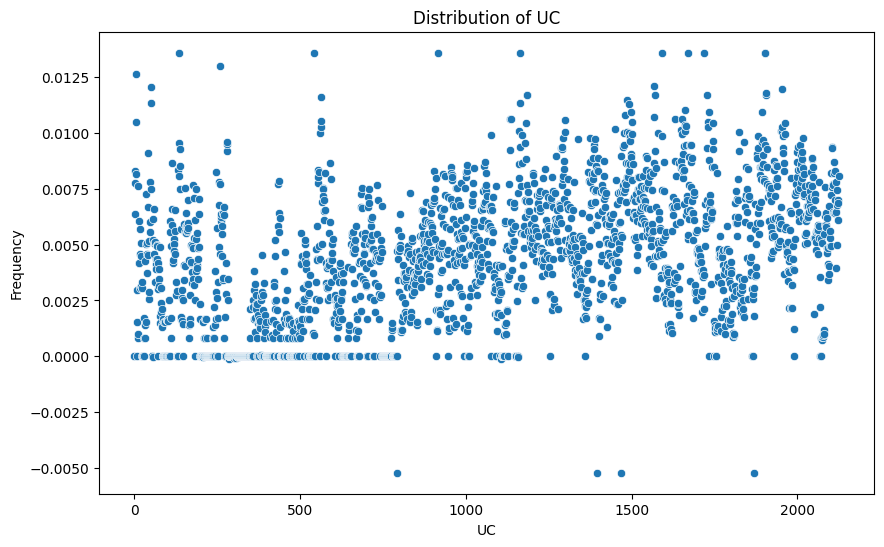

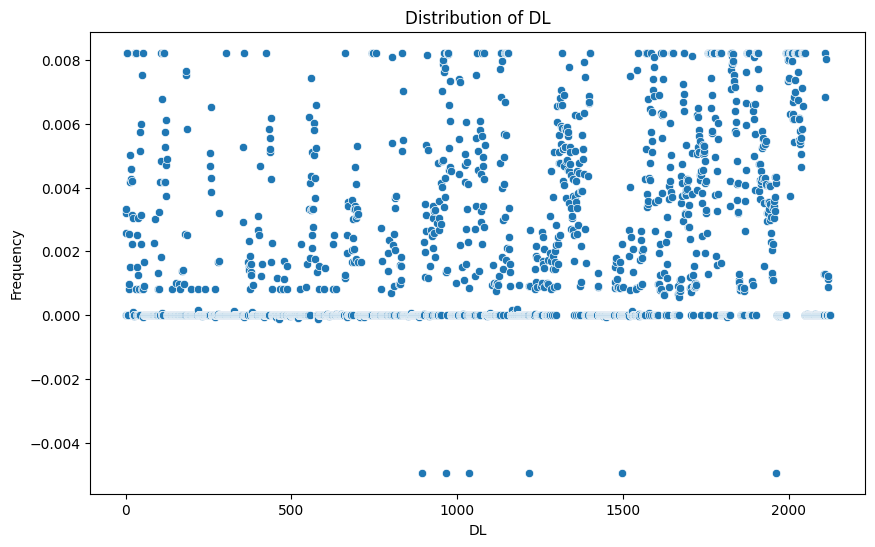

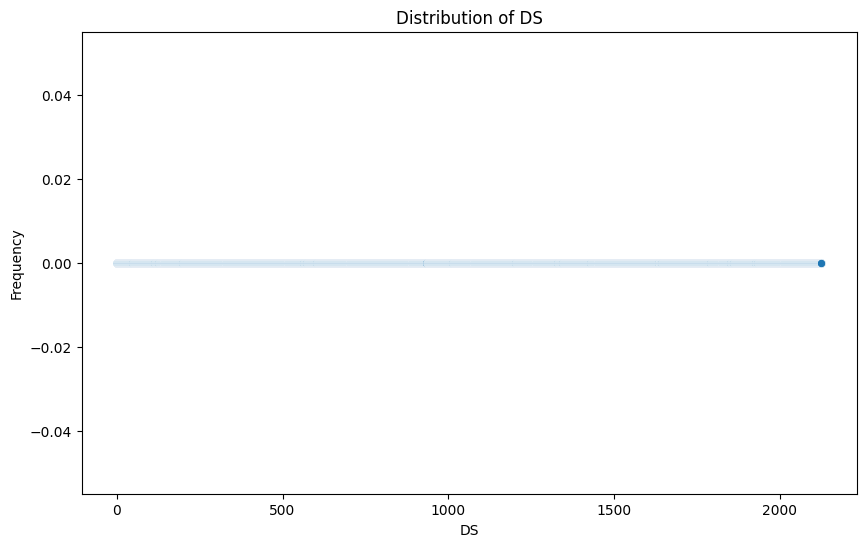

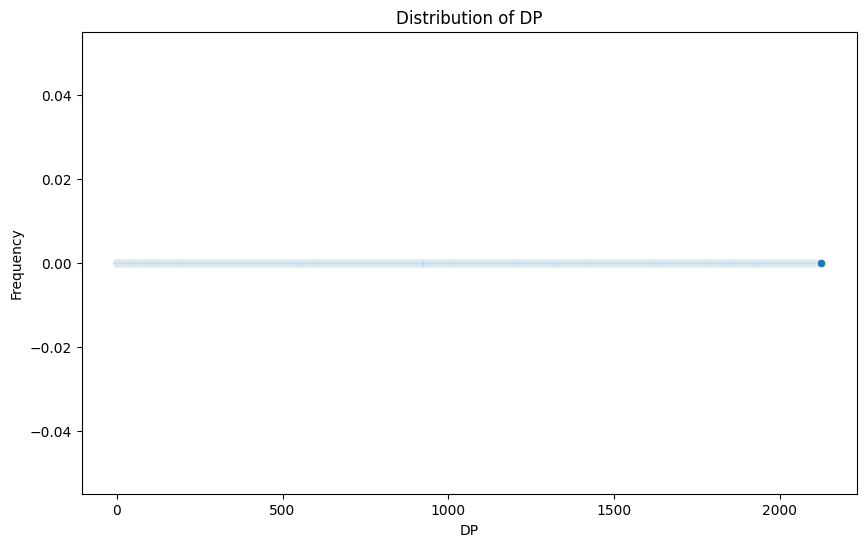

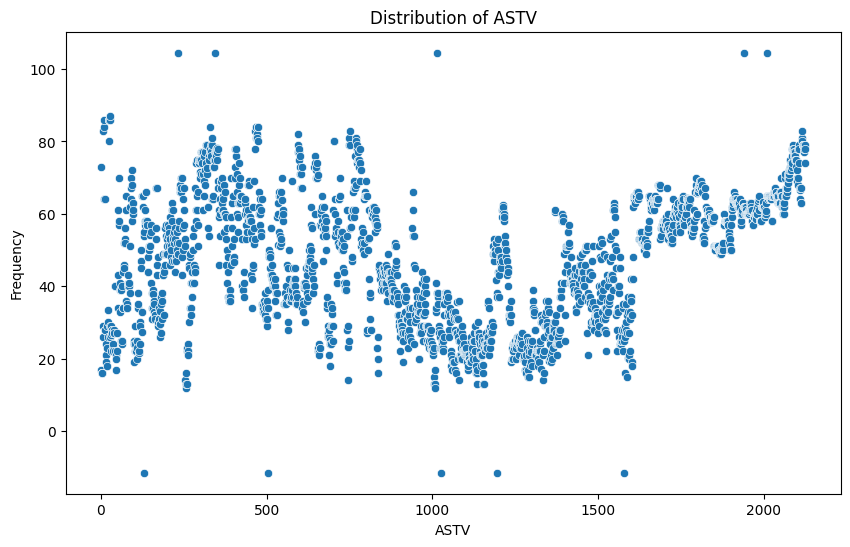

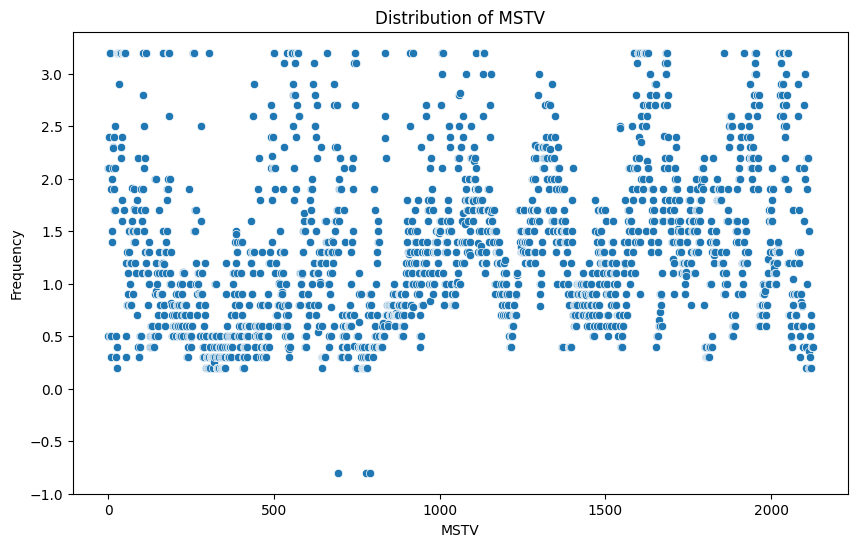

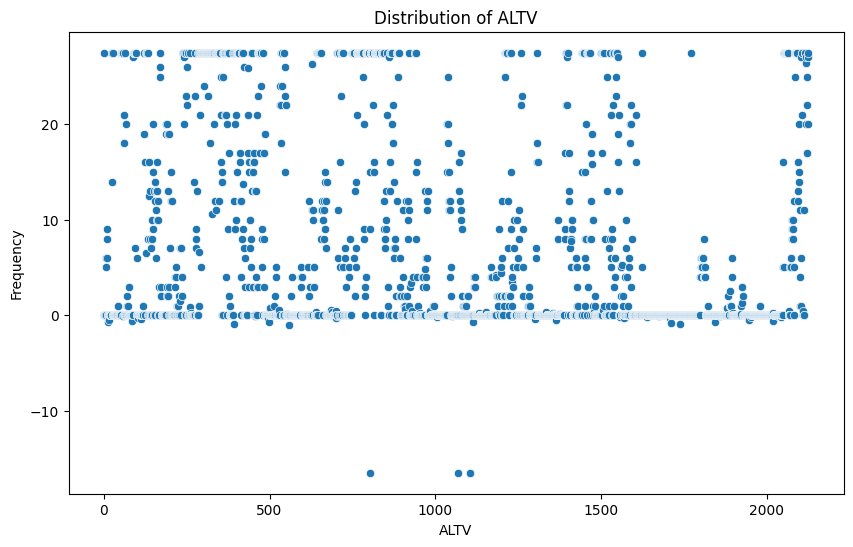

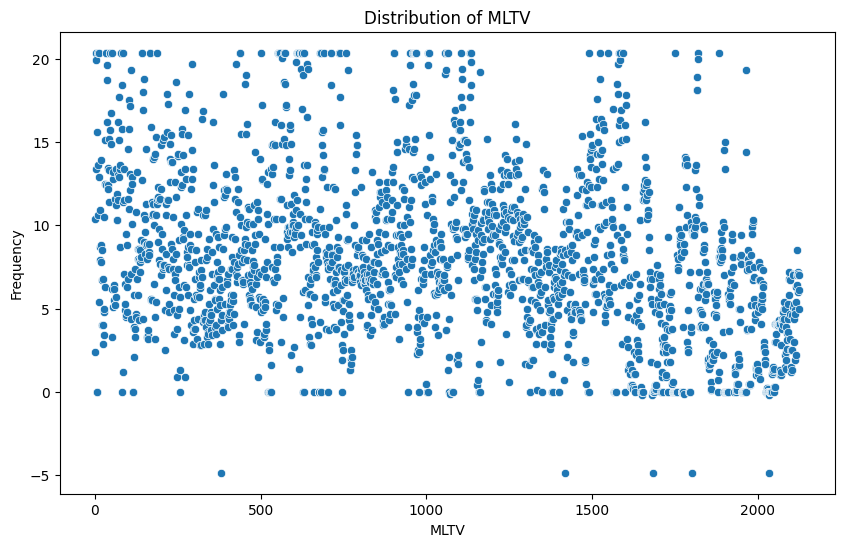

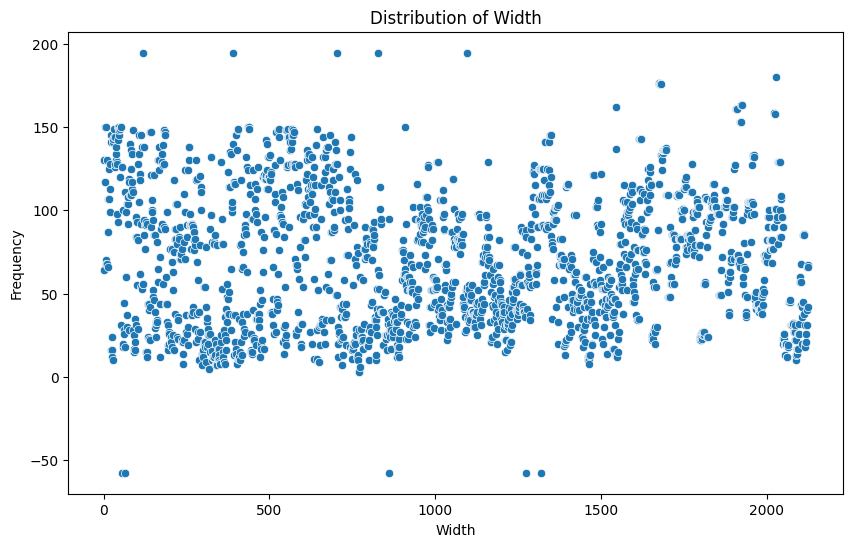

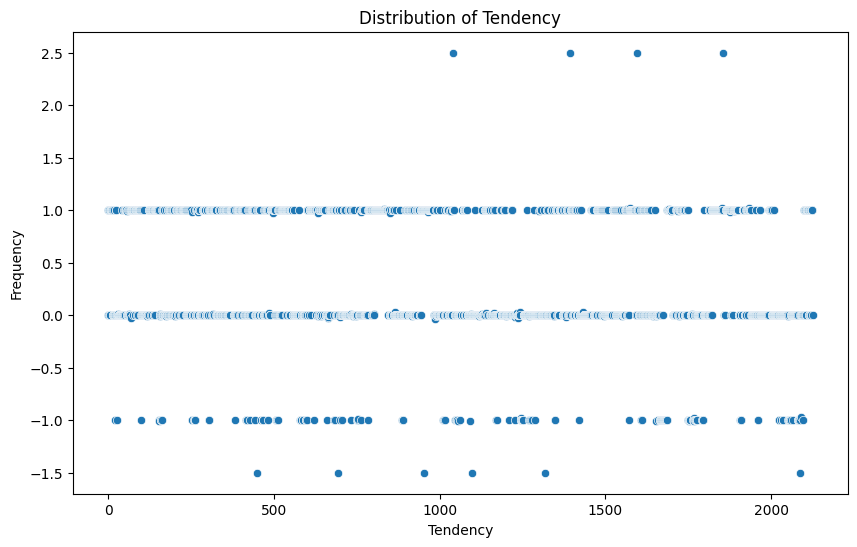

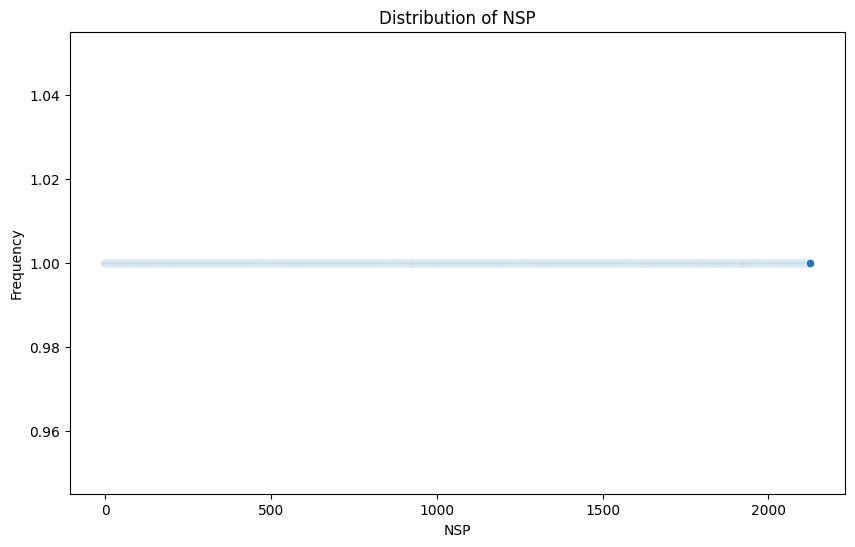

In [29]:
for col in df:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

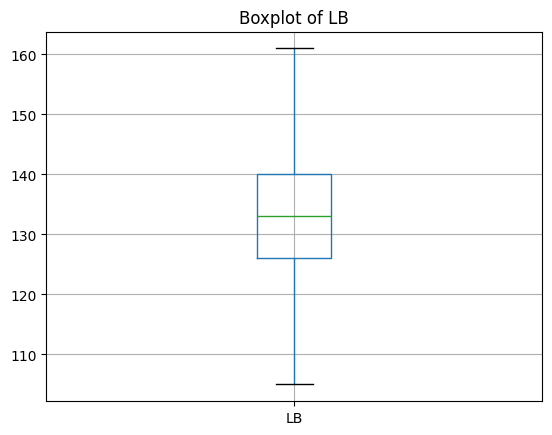

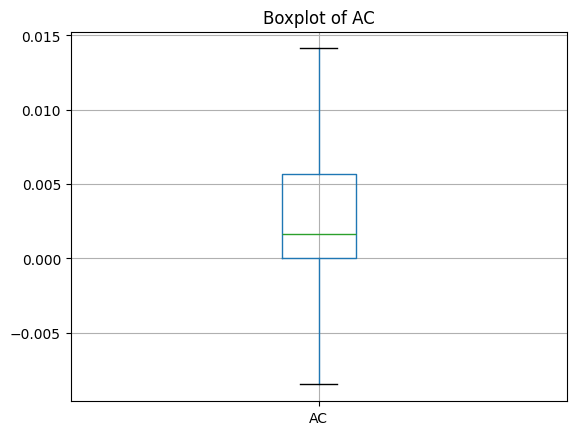

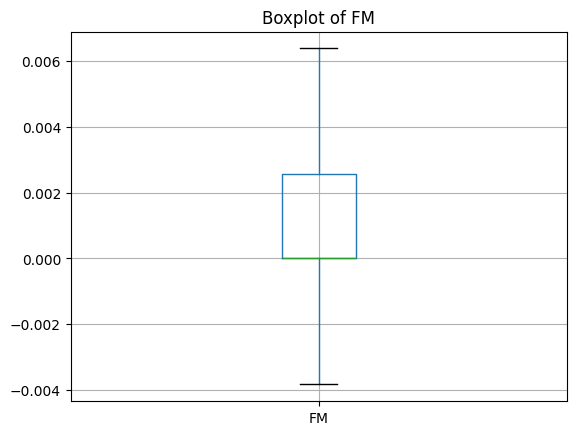

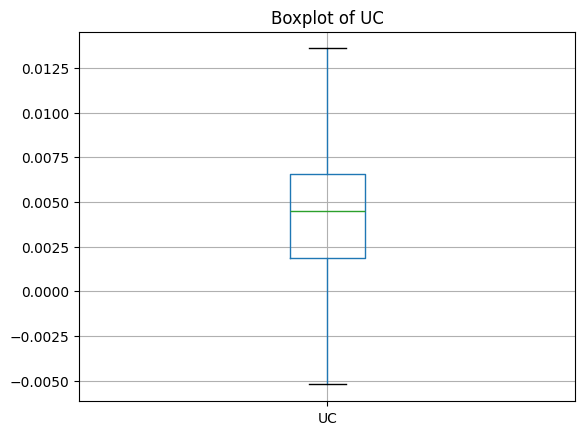

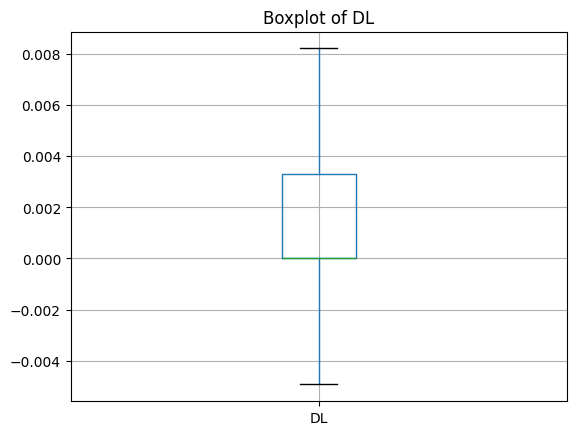

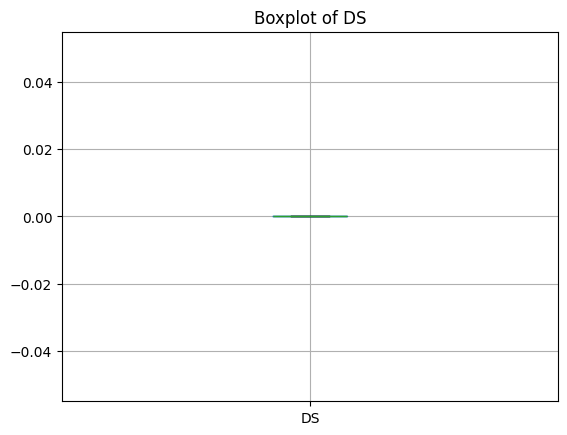

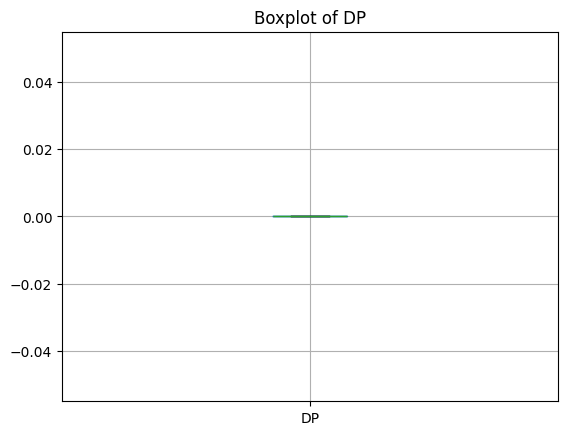

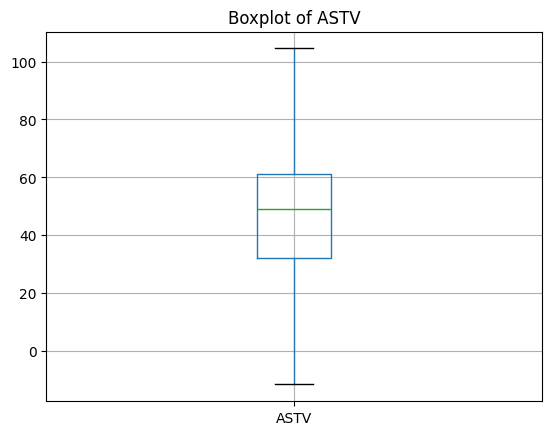

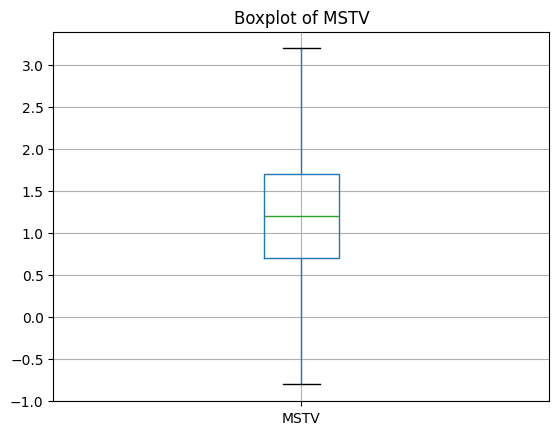

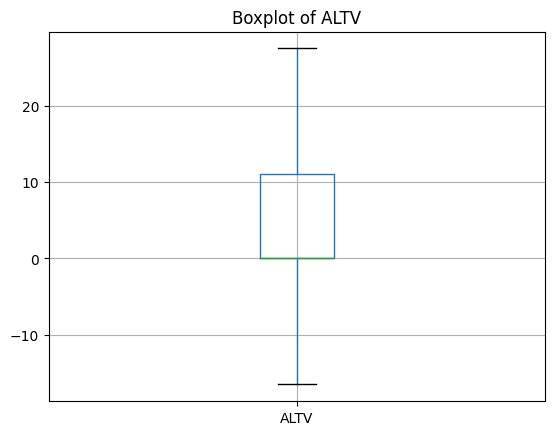

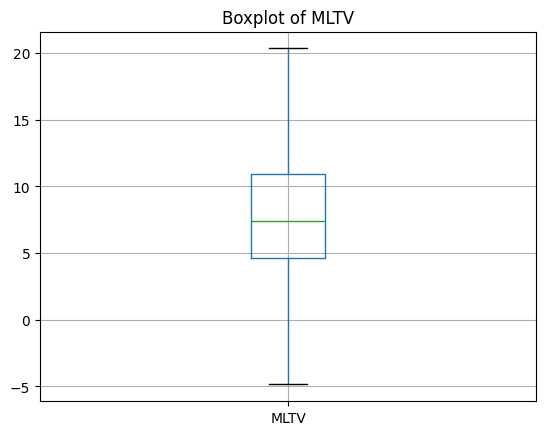

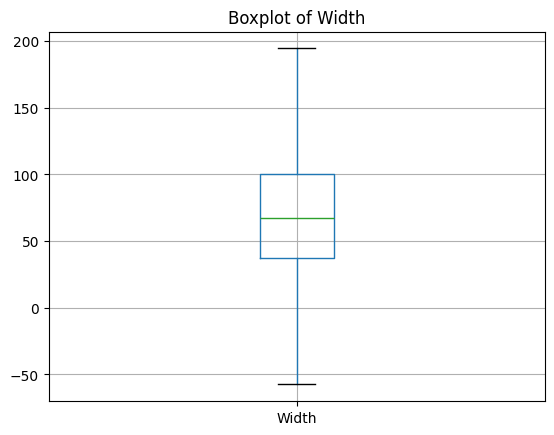

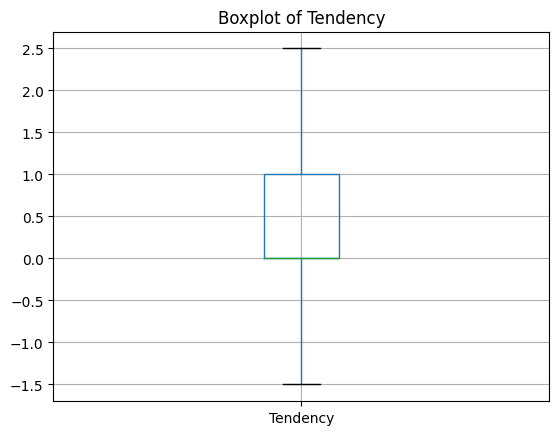

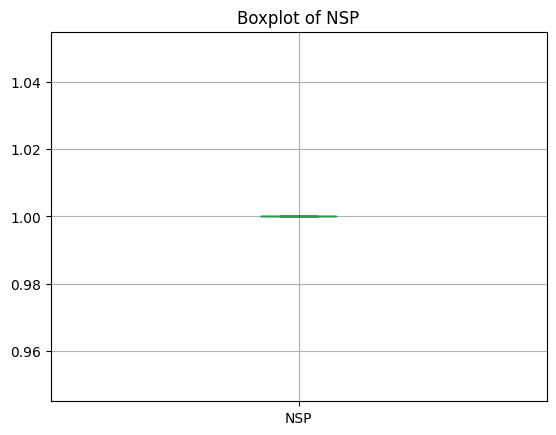

In [30]:
for col in df.columns:
    plt.figure()             # start a new figure
    df.boxplot(column=[col]) # boxplot for one column
    plt.title(f"Boxplot of {col}")
    plt.show()

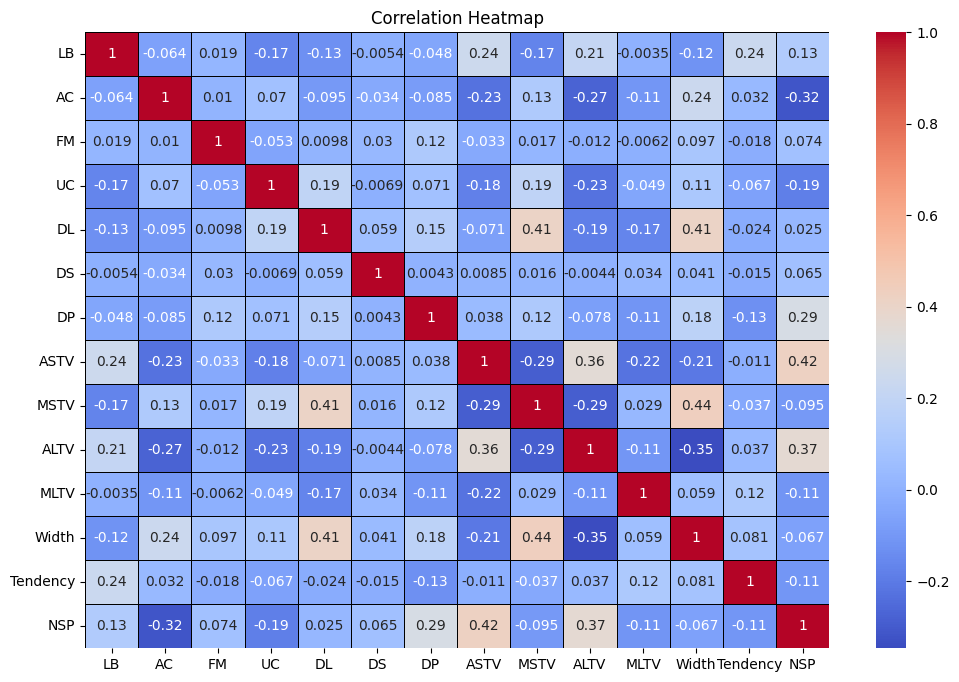

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', )
plt.title('Correlation Heatmap')
plt.show()



*  There is a moderate positive correlation between “DL-MSTV”, “DL-Width”, “ASTV-NSP” and “MSTV-Width”
*  If one in a pair increases, there is a possibility that the other one will also increase.



## Conclusion:


After conducting exploratory analysis of the dataset, several key insights have been uncovered:


*   There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.
*   The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.
*   Temporal analysis reveals a declining trend in variable Y over the observation period.

The identified correlations and trends could inform future predictive modeling efforts.

Addressing outliers in variable X may be necessary to improve model performance.

Further investigation into the factors driving the declining trend in variable Y is warranted.





